<a href="https://colab.research.google.com/github/AbdelghaniReguragui/Smile-detection/blob/main/smiledetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files

In [ ]:
#!rm smilesdataset.zip
#!rm -rf smilesdataset/

In [2]:
files.upload()

TypeError: ignored

In [ ]:
!unzip smilesdataset.zip

Archive:  smilesdataset.zip
   creating: smilesdataset/
   creating: smilesdataset/test/
   creating: smilesdataset/test/negatives/
 extracting: smilesdataset/test/negatives/1.jpg  
 extracting: smilesdataset/test/negatives/10.jpg  
 extracting: smilesdataset/test/negatives/100.jpg  
 extracting: smilesdataset/test/negatives/11.jpg  
 extracting: smilesdataset/test/negatives/12.jpg  
 extracting: smilesdataset/test/negatives/13.jpg  
 extracting: smilesdataset/test/negatives/14.jpg  
 extracting: smilesdataset/test/negatives/15.jpg  
 extracting: smilesdataset/test/negatives/16.jpg  
 extracting: smilesdataset/test/negatives/17.jpg  
 extracting: smilesdataset/test/negatives/18.jpg  
 extracting: smilesdataset/test/negatives/19.jpg  
 extracting: smilesdataset/test/negatives/2.jpg  
 extracting: smilesdataset/test/negatives/20.jpg  
 extracting: smilesdataset/test/negatives/21.jpg  
 extracting: smilesdataset/test/negatives/22.jpg  
 extracting: smilesdataset/test/negatives/23.jpg  
 e

In [ ]:
!ls

sample_data  smilesdataset  smilesdataset.zip


In [ ]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = []
labels = []
for i in range(1, 1001):
    ### reading positive samples
    imgtmp = cv2.imread('smilesdataset/train/positives/'+str(i)+'.jpg', 0)
    imgtmp = imgtmp.flatten()
    imgtmp = imgtmp.reshape(64,64)
    train_dataset.append(imgtmp)
    labels.append(1)
    ### negative samples
    imgtmp = cv2.imread('smilesdataset/train/negatives/'+str(i)+'.jpg', 0)
    imgtmp = imgtmp.flatten()
    imgtmp = imgtmp.reshape(64,64)
    train_dataset.append(imgtmp)
    labels.append(0)

In [ ]:
train_dataset = np.array(train_dataset)
train_dataset.shape

(2000, 64, 64)

In [ ]:
#save train and validation data from train image generator
train_dataset = train.flow_from_directory('smilesdataset/train/',
                                          target_size=(64,64),
                                          batch_size = 3,
                                          color_mode="grayscale",
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('smilesdataset/validation/',
                                          target_size=(64,64),
                                          batch_size = 3,
                                          color_mode="grayscale",
                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'negatives': 0, 'positives': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
#Create a model
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (64,64,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [ ]:
#Compiling the model
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.00001),
              metrics = ['accuracy'])

In [ ]:
#Train the model
model_fit = model.fit(train_dataset,
                      epochs = 20,
                      validation_data = validation_dataset)

Epoch 1/20
667/667 [==============================] - 29s 42ms/step - loss: 0.6886 - accuracy: 0.5630 - val_loss: 0.6817 - val_accuracy: 0.6355
Epoch 2/20
667/667 [==============================] - 28s 41ms/step - loss: 0.6744 - accuracy: 0.6245 - val_loss: 0.6701 - val_accuracy: 0.5360
Epoch 3/20
667/667 [==============================] - 28s 42ms/step - loss: 0.6597 - accuracy: 0.6995 - val_loss: 0.6470 - val_accuracy: 0.7605
Epoch 4/20
667/667 [==============================] - 28s 42ms/step - loss: 0.6363 - accuracy: 0.7250 - val_loss: 0.6258 - val_accuracy: 0.7040
Epoch 5/20
667/667 [==============================] - 28s 41ms/step - loss: 0.6079 - accuracy: 0.7585 - val_loss: 0.5892 - val_accuracy: 0.7975
Epoch 6/20
667/667 [==============================] - 28s 42ms/step - loss: 0.5754 - accuracy: 0.7730 - val_loss: 0.5531 - val_accuracy: 0.8115
Epoch 7/20
667/667 [==============================] - 28s 42ms/step - loss: 0.5391 - accuracy: 0.7870 - val_loss: 0.5259 - val_accuracy:

In [ ]:
#Impot testing data and Test our model
countp = 0
countn = 0
test_dataset = []
test_labels = []
for i in range(1, 101):
    imgtmp = cv2.imread('smilesdataset/test/positives/'+str(i)+'.jpg', 0)
    imgtmp = imgtmp.flatten()
    imgtmp = imgtmp.reshape(64,64)
    test_dataset.append(imgtmp)
    test_labels.append(1)
    plt.imshow(imgtmp, cmap='gray')
    plt.show()

    X = image.img_to_array(imgtmp)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)

    
    print("val = {}".format(int(val)))
    if int(val) == 0:
      countn = countn + 1
      print("Not smiling :(")
      print("")
    elif int(val) == 1:
      countp = countp + 1
      print("Smiling :)")
      print("")

print("countn = {}".format(countn))
print("countp = {}".format(countp))


NameError: ignored

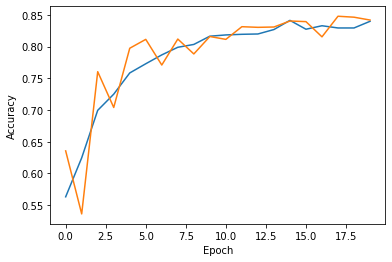

In [ ]:
plt.plot(model_fit.history['accuracy'], label='accuracy')
plt.plot(model_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#plt.show()

plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(np.array(test_dataset), test_labels, verbose=2)